In [16]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Database connection parameters
db_params = {
    'dbname': 'movie_db', 
    'user': 'postgres', 
    'password': '9YBhSoDiMhwFjhC892BcaVkFv5mdP8qFwM5Lv9jPwqekRWKLXEKF5Fjr9zCyKsMgVeXpUxbobMZJRth3GeUuPdbD2XiicCnTcNeFscJchuaEVaMDXMxZ8zJkoG9QMQjy', 
    'host': '49.13.1.33',
    'port': '5333'
}

# Connection
conn = psycopg2.connect(**db_params)
# Helper function to query the database
def query_db(sql_query, conn):
    return pd.read_sql_query(sql_query, conn)

def filter_adult_movies(df):
    return df[df['adult'] == False]

def filter_movies_with_revenue_and_budget(df):
    return df[(df['revenue'] > 0) & (df['budget'] > 0)]


# Distribution of persons involved by gender

/tmp/ipykernel_65987/1223095597.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


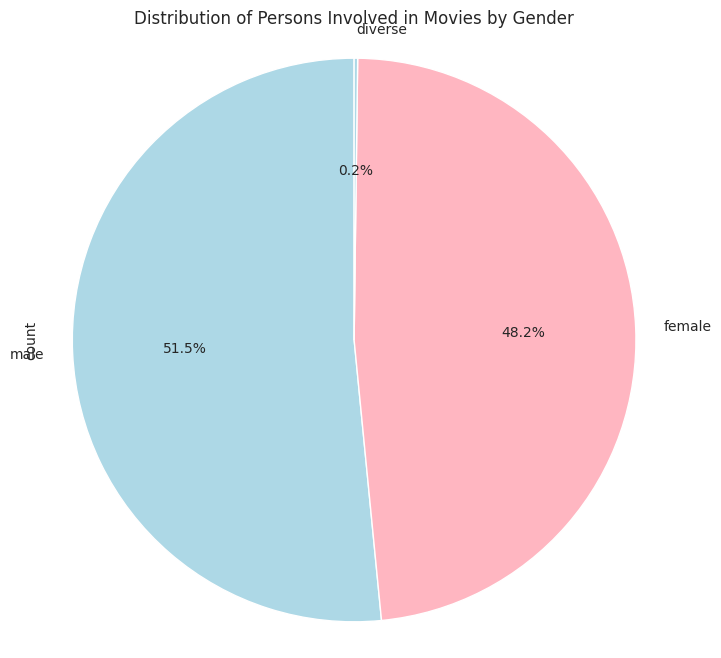

In [17]:
# Query the database
df_people = query_db("SELECT * FROM people", conn)

# Make a pie chart
# 1 is female, 2 is male, 3 is diverse, so we map them to strings
gender_counts = df_people['gender'].map({1: 'female', 2: 'male', 3: 'diverse'}).value_counts()

# Make a pie chart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
plt.title('Distribution of Persons Involved in Movies by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Movie budget over time

/tmp/ipykernel_65987/1223095597.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


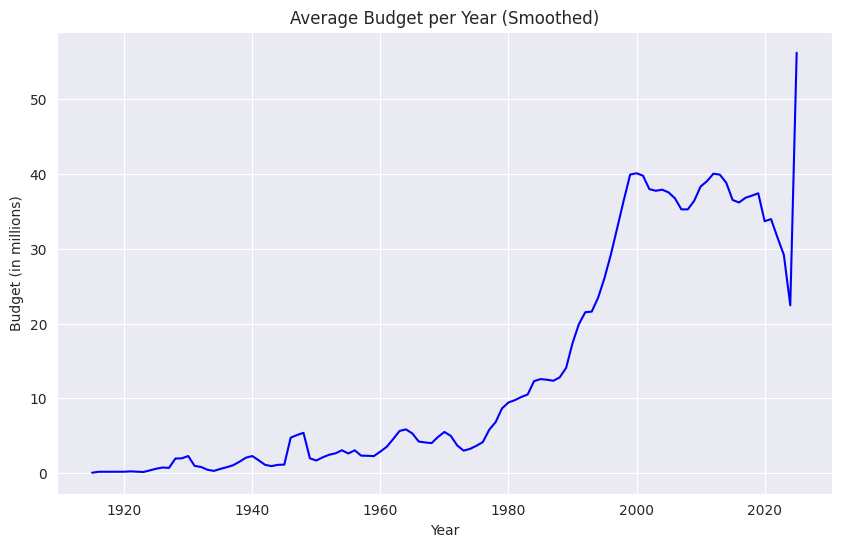

In [22]:
# Has the average budget for movies increased over time?
movies = query_db("SELECT * FROM movies", conn)

movies = filter_adult_movies(movies)
movies = movies[movies['budget'] > 0]
# Calculate average budget per year by taking it from the release date
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Extract the year from the release date
movies['year'] = movies['release_date'].dt.year

# Calculate the average budget per year
budget_per_year = movies.groupby('year')['budget'].mean()

# Smoothing the graph using rolling mean
window_size = 3  # Define the window size for the rolling mean
budget_per_year_smoothed = budget_per_year.rolling(window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(budget_per_year_smoothed, color='blue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x / 1000000)))
plt.title('Average Budget per Year (Smoothed)')
plt.xlabel('Year')
plt.ylabel('Budget (in millions)')
plt.grid(True)
plt.show()


# Year vs average profit

/tmp/ipykernel_65987/1223095597.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


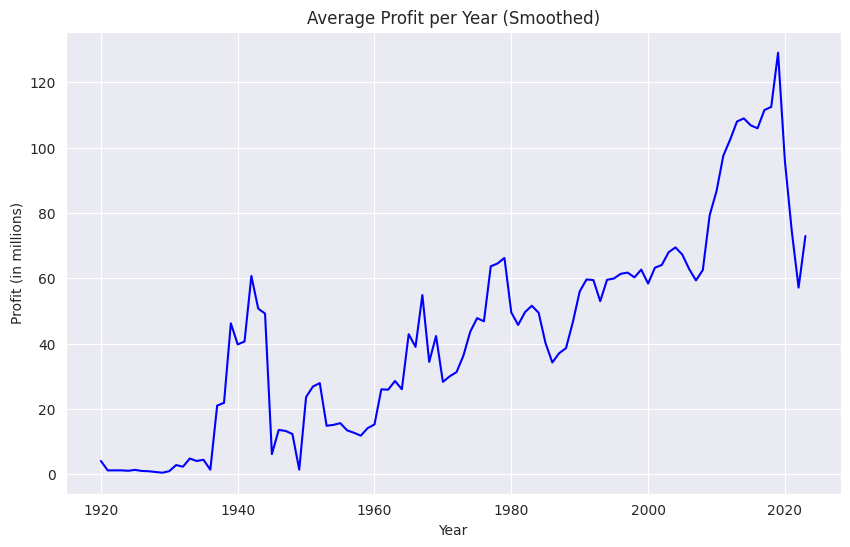

In [21]:
# Has the average profit for movies increased over time?
movies = query_db("SELECT * FROM movies", conn)

# Filter adult movies and movies where revenue or budget is 0
movies = filter_adult_movies(movies)
movies = filter_movies_with_revenue_and_budget(movies)

# Calculate average profit per year by taking it from the release date
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Extract the year from the release date
movies['year'] = movies['release_date'].dt.year

# Calculate the average profit per year
movies['profit'] = movies['revenue'] - movies['budget']

# Calculate the average profit per year
profit_per_year = movies.groupby('year')['profit'].mean()

# Smoothing the graph using rolling mean
window_size = 3  # Define the window size for the rolling mean
profit_per_year_smoothed = profit_per_year.rolling(window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(profit_per_year_smoothed, color='blue')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x / 1000000)))
plt.title('Average Profit per Year (Smoothed)')
plt.xlabel('Year')
plt.ylabel('Profit (in millions)')
plt.grid(True)
plt.show()